# Deep Learning Lab 1

In this lab, you're going experiment with a Fully Connected ANN to classify digits from the MNIST dataset and classify clothes from the Fashion MNIST dataset.

MNIST description: http://yann.lecun.com/exdb/mnist/index.html

Fashion MNIST description: https://www.kaggle.com/zalando-research/fashionmnist

# Imports

In [2]:
%matplotlib inline
import numpy as np
np.random.seed(1)

import tensorflow as tf
# WARNING: In TensorFlow 2.0 doesn't exist 
#tf.random.set_random_seed(2)

from tensorflow import keras
from keras import preprocessing

import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
print("tensorflow.keras version: ", keras.__version__)
print("numpy version: ", np.__version__)

TensorFlow version:  1.14.0
tensorflow.keras version:  2.2.4-tf
numpy version:  1.16.4


Using TensorFlow backend.


# Grab the data

Load the data from either `keras.datasets.mnist` or `keras.datasets.fashion_mnist` in `(training_images, training_labels), (test_images, test_labels)`.

Print the shape of each variable.

In [7]:
print("UNCOVER ME")

#dataset = keras.datasets.mnist
dataset = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = dataset.load_data()

print("training_images shape: ", training_images.shape)
print("training_labels shape: ", training_labels.shape)
print("test_images shape: ", test_images.shape)
print("test_labels shape: ", test_labels.shape)

UNCOVER ME
training_images shape:  (60000, 28, 28)
training_labels shape:  (60000,)
test_images shape:  (10000, 28, 28)
test_labels shape:  (10000,)


# Explore the data

Display using `matplotlib` `plt.imshow` a sample from `training_images`

UNCOVER ME
displaying sample 100 from training_images
(60000, 28, 28)
<class 'numpy.ndarray'>


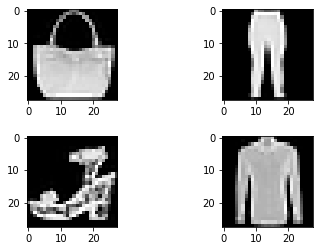

In [30]:
print("UNCOVER ME")

sample_id = 100

print("displaying sample {} from training_images".format(sample_id))
print(training_images.shape)
print(type(training_images))
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
plt.imshow(training_images[100], cmap='gray')
ax = fig.add_subplot(2, 2, 2)
plt.imshow(training_images[80], cmap='gray')
ax = fig.add_subplot(2, 2, 3)
plt.imshow(training_images[60], cmap='gray')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
plt.imshow(training_images[40], cmap='gray')
plt.show()

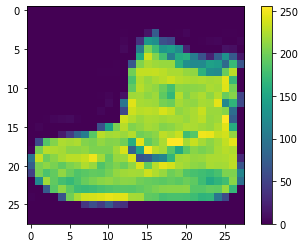

In [31]:
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

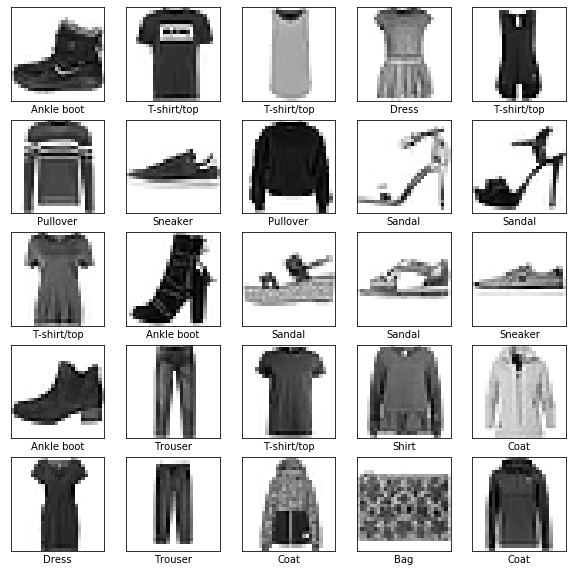

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

training_images.shape initial:  (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   

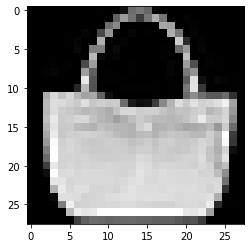

In [40]:
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print("training_images.shape initial: ", training_images.shape)
print(training_images[100])
print(training_labels[100])
plt.imshow(training_images[100], cmap='gray')

In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.
  0.07058824 0.41960784 0.46666667 0.40392157 0.03529412 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.38823529
  0.60784314 0.44313725 0.23921569 0.4627451  0.67843137 0.45882353
  0.         0.         0.01176471 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.43137255 0.53333333
  0.         0.         0.         0.         0.         0.65490196
  0.62352941 0.         0.         0.00784314 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.         0.02352941 0.         0.28

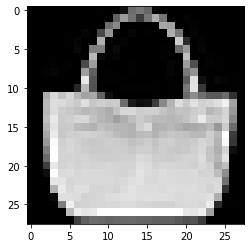

In [5]:
print(training_images[100])
print(training_labels[100])
plt.imshow(training_images[100], cmap='gray')

In [6]:
training_images = (training_images - mean) / stddev
test_images = (test_images - mean) / stddev

NameError: name 'mean' is not defined

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.
  0.07058824 0.41960784 0.46666667 0.40392157 0.03529412 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.38823529
  0.60784314 0.44313725 0.23921569 0.4627451  0.67843137 0.45882353
  0.         0.         0.01176471 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.43137255 0.53333333
  0.         0.         0.         0.         0.         0.65490196
  0.62352941 0.         0.         0.00784314 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.         0.02352941 0.         0.28

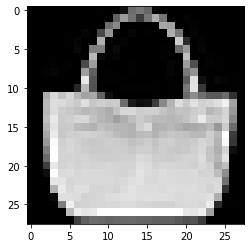

In [7]:
print(training_images[100])
print(training_labels[100])
plt.imshow(training_images[100], cmap='gray')

In [8]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [9]:
training_images.shape

(60000, 28, 28, 1)

In [10]:
print(training_images[100])
print(training_labels[100])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.07058824]
  [0.41960784]
  [0.46666667]
  [0.40392157]
  [0.03529412]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.38823529]
  [0.60784314]
  [0.44313725]
  [0.23921569]
  [0.4627451 ]
  [0.67843137]
  [0.45882353]
  [0.        ]
  [0.        ]
  [0.01176471]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.4

In [12]:
y = np.ones((2, 3, 4))
print("2 Matrices with 3x4 Dimensons")
print(y)
print("-------")
print(y[0])

2 Matrices with 3x4 Dimensons
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
-------
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [13]:
x = y.reshape(2, 3, 4, 1)
print(x)
print("--------")
print(x[0])
print("2 Matrices split into 3 Vectors ")
x[0][0]

[[[[1.]
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   [1.]]]]
--------
[[[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]]]
2 Matrices split into 3 Vectors 


array([[1.],
       [1.],
       [1.],
       [1.]])

# Normalization

Our images have a dtype of uint8 which means that the values are from $[0, 255)$.

We will transform the values in the interval of $[0, 1]$ and do standardization (mean substraction and division by standard deviation).

In [3]:
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print("training_images.shape initial: ", training_images.shape)

training_images = training_images / 255.0
test_images = test_images / 255.0

mean = np.mean(training_images)
stddev = np.std(training_images)

training_images = (training_images - mean) / stddev
test_images = (test_images - mean) / stddev

# reshape to make it clear that our dataset is grayscale (one single value per pixel)
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print("training_images.shape after resize: ", training_images.shape)

training_images.shape initial:  (60000, 28, 28)
training_images.shape after resize:  (60000, 28, 28, 1)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(training_images.shape)
#Each Label is between 0-9
print(training_labels)
print(test_images.shape)

(60000, 28, 28, 1)
[9 0 0 ... 3 0 5]
(10000, 28, 28, 1)


Normalize the data (both training and test) by substracting the mean and dividing by the standard deviation.

Make sure you compute the mean/stddev on training data!

# Model creation

Create the model and compile it. Print the type of the model.

In [6]:
# let's start with 32, then lower the number of convs
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

model.summary()

history = model.fit(
    training_images, training_labels,
    validation_data=(test_images, test_labels),
    # batch_size affects performance dramatically
    batch_size=1024,
    epochs=10
)

W0807 09:51:45.636472 140250849544000 deprecation.py:506] From /home/opc/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [14]:
keras.experimental.export_saved_model(model, '/home/opc/oco/modeltwo')

W0806 11:41:23.035915 140531999147840 deprecation.py:323] From /home/opc/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0806 11:41:23.037388 140531999147840 export_utils.py:182] Export includes no default signature!
W0806 11:41:23.423909 140531999147840 export_utils.py:182] Export includes no default signature!


In [9]:
model.save('my_model_6.h5')

In [25]:
new_model_two_new = keras.experimental.load_from_saved_model('/home/opc/oco/modeltwo')

In [18]:
new_model_two.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
new_model_two.evaluate(test_images, test_labels)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [16]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 104us/sample - loss: 0.3004 - acc: 0.8931


# Keras plotting the accuracy, loss graphs

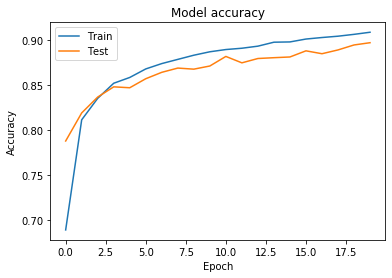

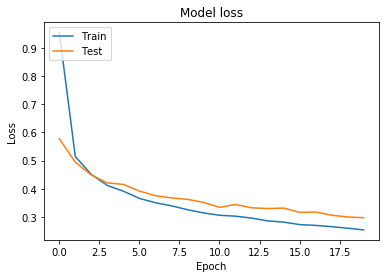

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the model evolution

Evaluate the model on train and test images

In [16]:
print("UNCOVER ME")

print(model.evaluate(training_images, training_labels, verbose=1))

print(model.evaluate(test_images, test_labels, verbose=1))

UNCOVER ME
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2583 - acc: 0.9074
[0.258279112525781, 0.90735]
10000/10000 [==============================] - 1s 105us/sample - loss: 0.3052 - acc: 0.8899
[0.30516642904281616, 0.8899]


## Number of parameters

**Conv2D parameters**

640 parameters for our first `Conv2D` layer.
For the first input layer, we allocate `64` Convs of size `3x3`, depth `1`, the number of parameters can be computed as: 3 (width) * 3 (height) * 1 (depth) * 64 (number of convs) + 64 (one bias term for every conv) = 640

It is important to remember that the number of parameters in the `Conv2D` does not depend on the input size.
In this example we have an input image of `(28, 28)`

# Data Augmentation

Remember bias/variance tradeoff, and how to avoid overfitting?

Usually we don't have enough data, but given what we have, we can generate more by applying different transformations, e.g.:
* random rotations
* brightness changes
* horizonta/vertical flips
* rescaling
* zoom
* random noise

Keras has support for these implemented in `keras.preprocessing.image.ImageDataGenerator`.

Training with a data generator is as simple as using `model.fit_generator()` instead of `model.fit()`.

Keras documentation on ImageDataGenerator: https://keras.io/preprocessing/image/

Keras documentation on using the `fit_generator`: https://keras.io/models/model/#fit_generator

In [18]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
)

generator = datagen.flow(
    training_images, training_labels,
    seed=1,
    batch_size=1,
    shuffle=False
)

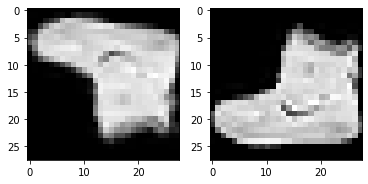

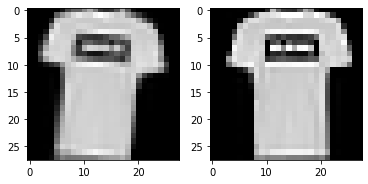

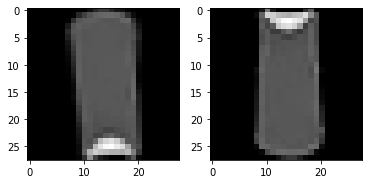

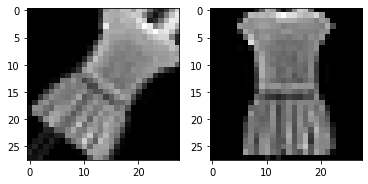

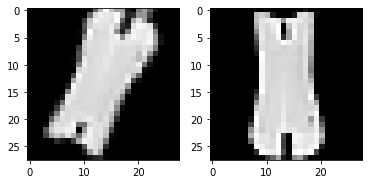

In [19]:
for i in range(0, 5):
    fig, axes = plt.subplots(1, 2)
    
    img, label = generator.next()
    img = img.reshape(28, 28)

    axes[0].imshow(img, cmap='gray')
    axes[1].imshow(training_images[i].reshape(28, 28), cmap='gray')
    plt.show()

# CNN Architectures

It's not an easy task to put these layers together in an efficient way.
Computer Vision Researchers spent a lot of time studying how to come up with clever architectures.

Examples of CNN architectures (older to newer):
* LeNet-5 (1998)
* AlexNet
* VGG16/19
* ResNet (includes skip connections)
* Inception v1 (GoogLeNet)
* Inception v2, v3...
* MobileNets (v1, v2, v3) for embedded arch, designed for high efficiency/real time processing
* YOLO (You Only Look Once), Object detector
* MTCNN for Facial Landmark detection

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [20]:
predictions = model.predict(test_images)
print(predictions[0])

print(predictions[0].round(4))

[3.1814748e-06 1.6243277e-08 4.7032778e-08 3.1105213e-08 7.6082811e-09
 2.5574785e-02 1.3435467e-06 2.0620678e-02 1.1876360e-04 9.5368105e-01]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.560e-02 0.000e+00
 2.060e-02 1.000e-04 9.537e-01]


In [64]:
np.argmax(predictions[0])

9

In [66]:
test_labels[0]

9

In [67]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

TypeError: Invalid shape (28, 28, 1) for image data

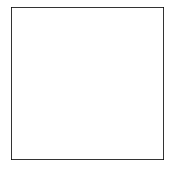

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# New Images

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

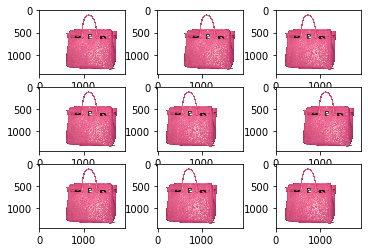

In [20]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('img/bag01.jpg')
#img = img.convert('LA')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

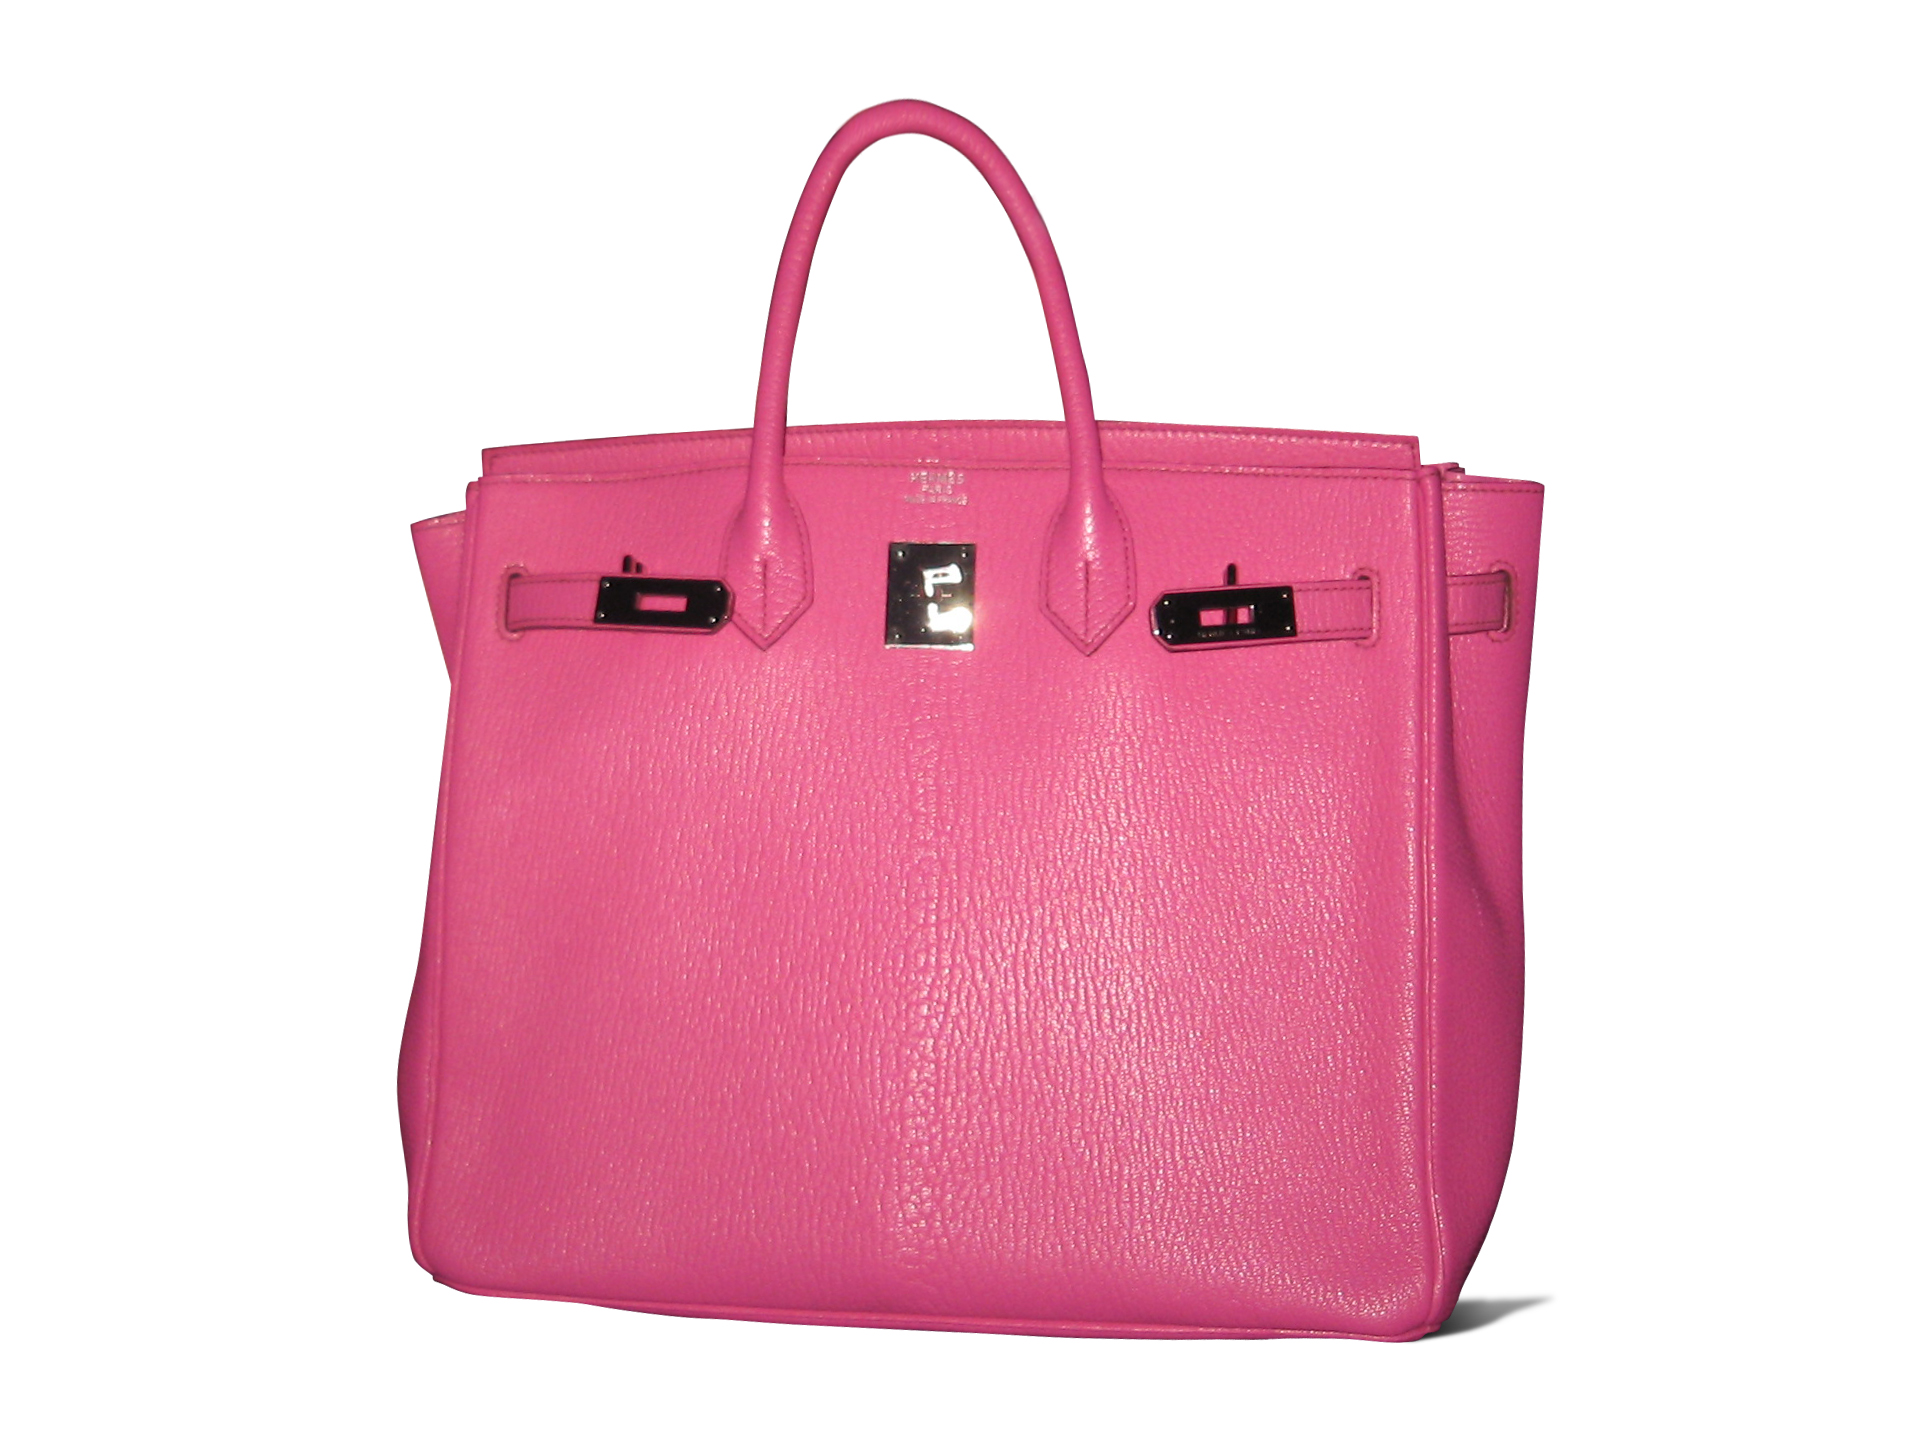

In [21]:
img

In [167]:
import cv2

In [4]:
data.shape

(1442, 1921, 3)

W0716 14:31:28.936032 140543645501248 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


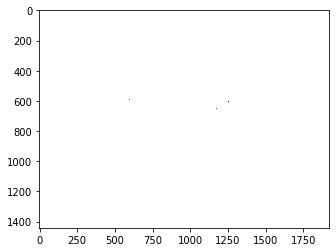

In [5]:
plt.imshow(data, cmap='gray')

In [6]:
from keras_preprocessing.image import ImageDataGenerator

In [9]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
directory="./img/",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

TypeError: flow_from_dataframe() missing 1 required positional argument: 'dataframe'

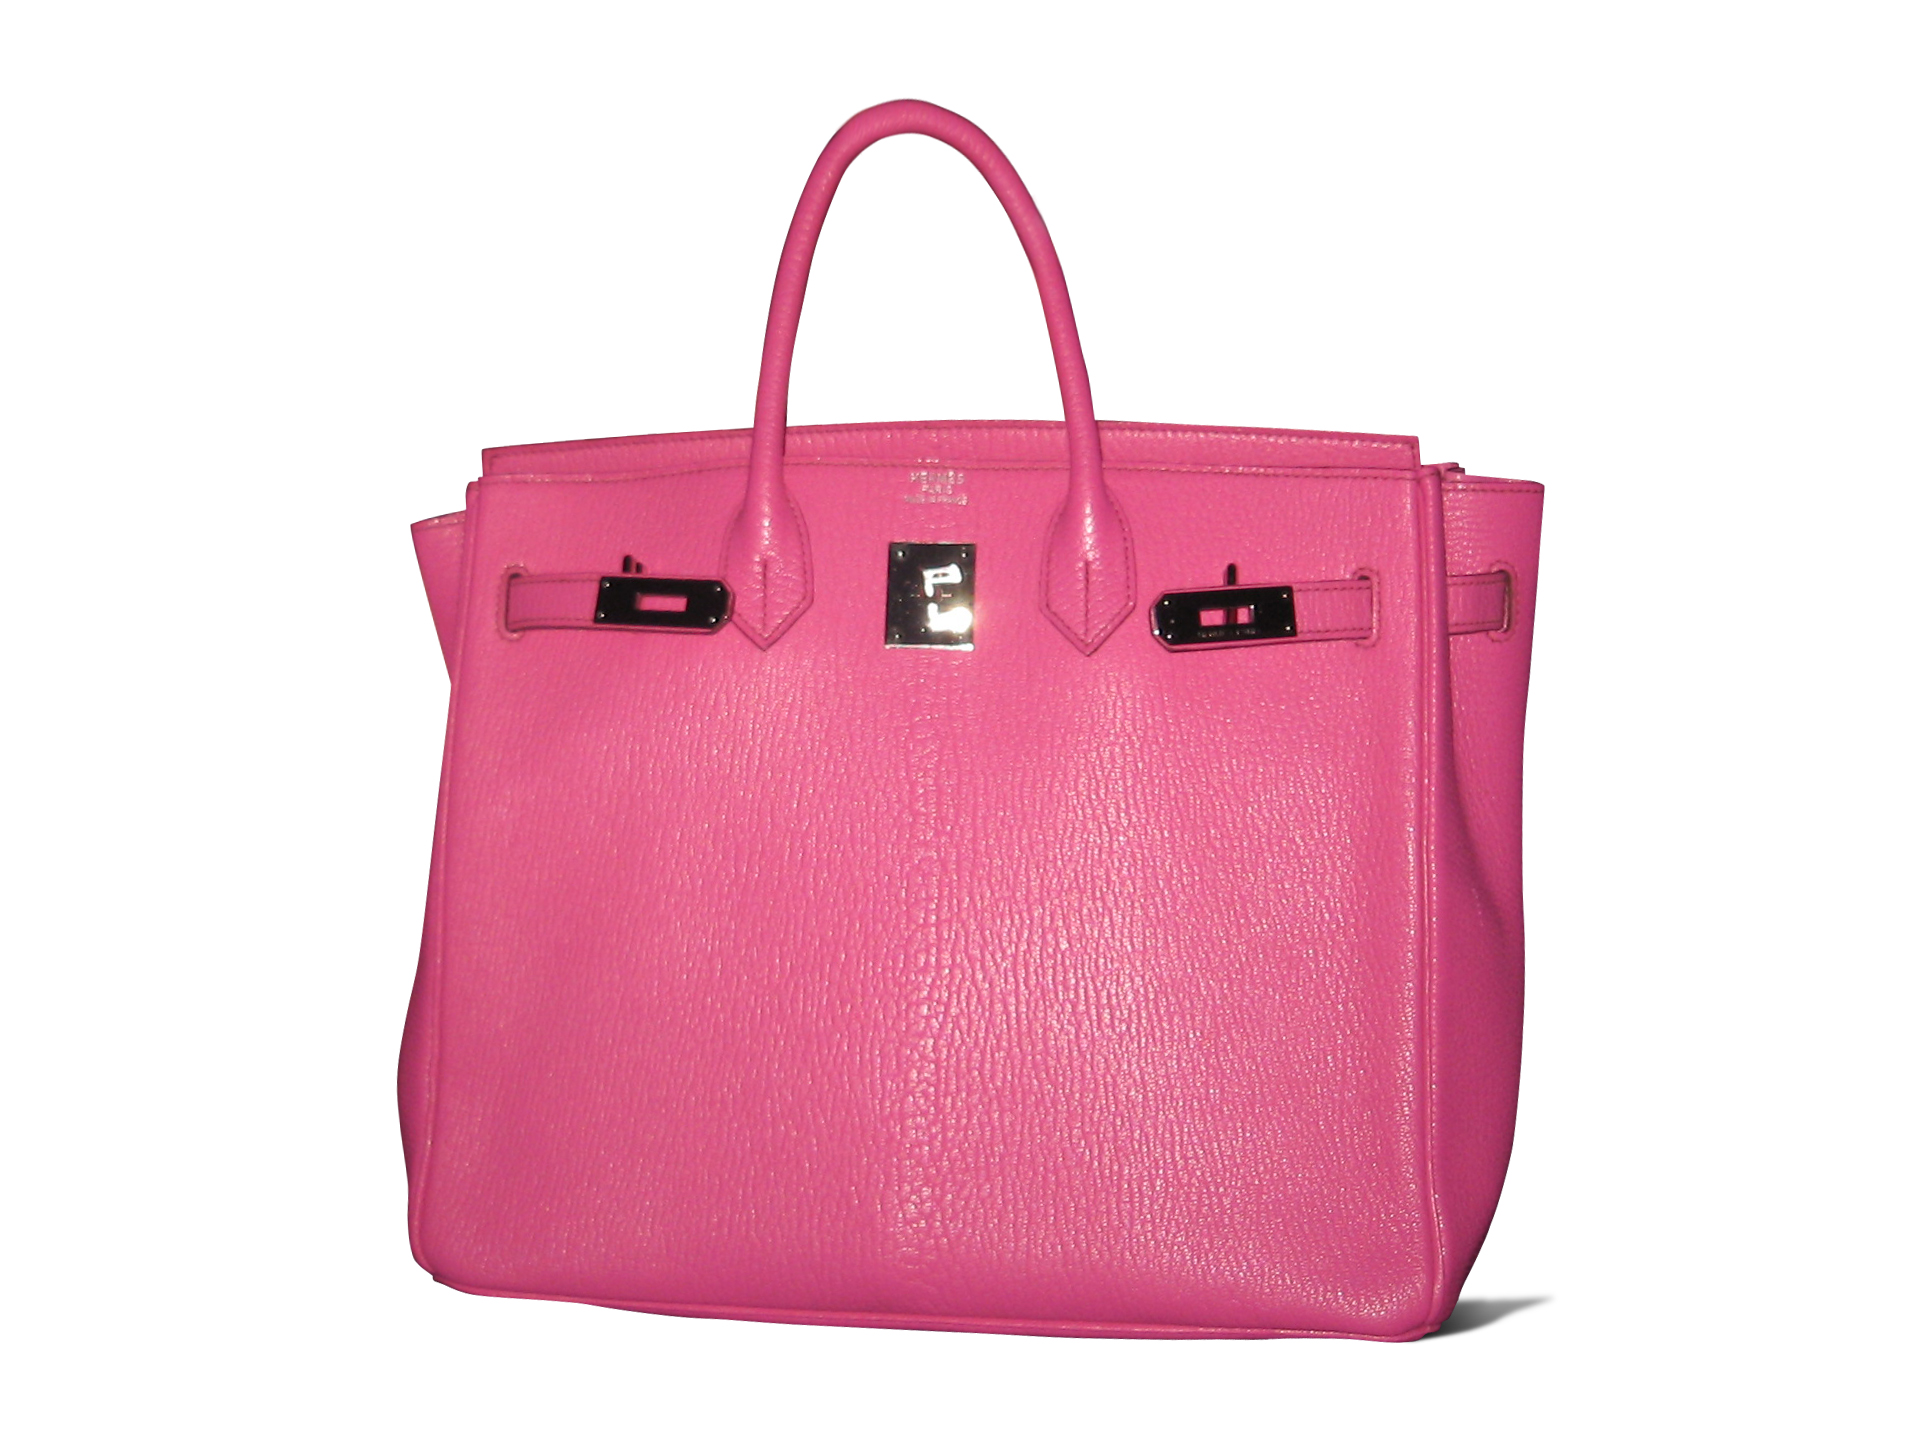

In [10]:
img

In [20]:
img1 = load_img('img/bag01.jpg', target_size=(28,28))
img2 = img_to_array(img1)

In [22]:
img2.shape

(28, 28, 3)

In [70]:
img3 = img2[0]

NameError: name 'img2' is not defined

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [34]:
import cv2
imga = cv2.imread('img/shirt02.jpg')
imga = np.invert(imga)
imgb = cv2.resize(imga, (28, 28))
imgc = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
imgd = imgc.reshape((-1, 28, 28,1))
imgd = imgd / 255

In [51]:
imgb.shape

(28, 28, 3)

In [47]:
from keras.preprocessing import image
#imgf = imgd.astype('float16')
#payload = {
#    "instances": [{'input_image': imgf.tolist()}]
#}
#payload

imgtest = image.img_to_array(image.load_img('img/shirt02.jpg', target_size=(224, 224))) / 255
imgtest.shape

(224, 224, 3)

In [33]:
testpredictions = new_model_two_new.predict(imgd)
testpredictions
np.argmax(testpredictions)

6

In [142]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
imgd

array([[[[255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         [255],
         [255],
         [255],
    

In [89]:
np.invert(imgd)

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    